### K-Means Algorithm - Wine

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
wine = load_wine()
wine_std =  StandardScaler().fit_transform(wine.data)

pca = PCA(2)
wine_pca = pca.fit_transform(wine_std)

In [3]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

##### 1. 군집화(Clustering)

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, verbose=1, random_state=2023, n_init='auto')
kmeans.fit(wine_std)

Initialization complete
Iteration 0, inertia 2548.417250768871.
Iteration 1, inertia 1337.4498210139172.
Iteration 2, inertia 1288.1962895450683.
Iteration 3, inertia 1281.2533740452782.
Iteration 4, inertia 1279.9661527749454.
Converged at iteration 4: strict convergence.


KMeans(n_clusters=3, n_init='auto', random_state=2023, verbose=1)

In [5]:
# 학습결과 
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
# 군집 중심점
kmeans.cluster_centers_

array([[-0.94014377, -0.36925222, -0.39392459,  0.2501918 , -0.57428004,
        -0.03397922,  0.08356049,  0.00898298,  0.00992315, -0.883509  ,
         0.43799597,  0.29533594, -0.77836832],
       [ 0.16490746,  0.87154706,  0.18689833,  0.52436746, -0.07547277,
        -0.97933029, -1.21524764,  0.72606354, -0.77970639,  0.94153874,
        -1.16478865, -1.29241163, -0.40708796],
       [ 0.82157017, -0.33042473,  0.24887871, -0.67865104,  0.6444926 ,
         0.82730976,  0.89888505, -0.59689129,  0.62111023,  0.13533493,
         0.49797586,  0.74621417,  1.12027076]])

In [6]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2]), array([64, 51, 63], dtype=int64))

##### 2. 시각화

In [7]:
df = pd.DataFrame(wine_pca, columns=['PC1', 'PC2'])
df['target'] = wine.target
df['cluster'] = kmeans.labels_


In [8]:
# 데이터 분포
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      2         59
1      0         64
       1          3
       2          4
2      1         48

- PCA Original Data와 비교

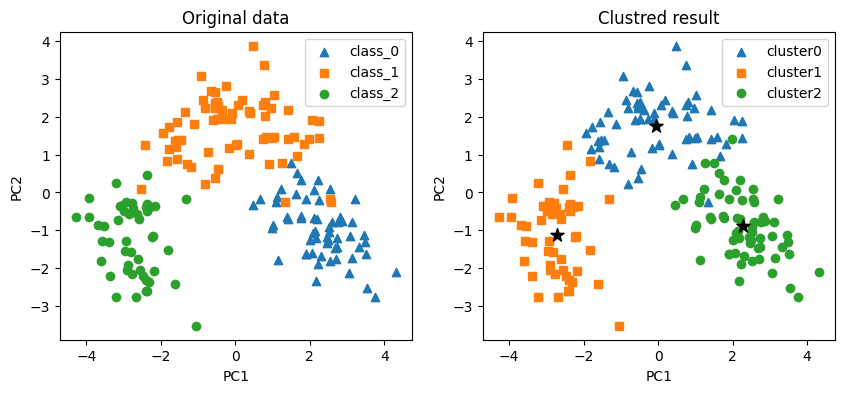

In [13]:
markers = ['^', 's', 'o']

plt.figure(figsize=(10, 4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)

    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.scatter(x_data, y_data, marker=marker, label=wine.target_names[i])
        else:
            plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
            plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='black', s=100)

    plt.legend()
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    if k == 0:
        plt.title('Original data')
    else:
        plt.title('Clustred result')

plt.show()